# EDA Michael

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# increase number of displayed df columns, since our data has quite a lot
# (default is 20)
pd.options.display.max_columns = 100

## Load data

In [2]:
# merged_data.csv contains only complete observations (~ 450,000 of a total 2M)
# 'toxic' column = target! (1 if 'toxicity' >= 0.5)
df = pd.read_csv('data/merged_data.csv')

## First overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447998 entries, 0 to 447997
Data columns (total 44 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   id                                   447998 non-null  int64  
 1   comment_text                         447998 non-null  object 
 2   split                                447998 non-null  object 
 3   created_date                         447998 non-null  object 
 4   rating                               447998 non-null  object 
 5   funny                                447998 non-null  int64  
 6   wow                                  447998 non-null  int64  
 7   sad                                  447998 non-null  int64  
 8   likes                                447998 non-null  int64  
 9   disagree                             447998 non-null  int64  
 10  toxicity                             447998 non-null  float64
 11  severe_toxici

In [4]:
df.head()

,id,comment_text,split,created_date,rating,funny,wow,sad,likes,disagree,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat,male,female,transgender,other_gender,heterosexual,homosexual_gay_or_lesbian,bisexual,other_sexual_orientation,christian,jewish,muslim,hindu,buddhist,atheist,other_religion,black,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability,identity_annotator_count,toxicity_annotator_count,toxic
0,627762,OH yes - Were those evil Christian Missionarie...,train,2016-11-26 15:56:03.862109+00,approved,0,0,0,0,0,0.800000,0.000000,0.000000,0.000000,0.700000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,10,1
1,5892815,Why is this black racist crap still on the G&M...,train,2017-09-03 23:20:08.226613+00,rejected,0,0,0,0,0,0.757143,0.142857,0.471429,0.014286,0.614286,0.642857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,70,1
2,416437,even up here.......BLACKS!,train,2016-08-04 16:48:07.175252+00,rejected,0,0,0,1,0,0.688525,0.032787,0.049180,0.000000,0.639344,0.213115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,61,1
3,5137126,Blame men. There's always an excuse to blame ...,train,2017-04-15 19:00:45.032674+00,rejected,0,0,0,0,0,0.545455,0.000000,0.000000,0.000000,0.636364,0.272727,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,11,1
4,855753,And the woman exposing herself saying grab thi...,train,2017-01-18 01:50:57.478867+00,rejected,0,0,0,0,0,0.728571,0.000000,0.600000,0.628571,0.114286,0.300000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,70,1


In [5]:
# check for NaNs
df.isnull().sum()

id                                     0
comment_text                           0
split                                  0
created_date                           0
rating                                 0
funny                                  0
wow                                    0
sad                                    0
likes                                  0
disagree                               0
toxicity                               0
severe_toxicity                        0
obscene                                0
sexual_explicit                        0
identity_attack                        0
insult                                 0
threat                                 0
male                                   0
female                                 0
transgender                            0
other_gender                           0
heterosexual                           0
homosexual_gay_or_lesbian              0
bisexual                               0
other_sexual_ori

In [6]:
# Check string columns other then comment_text. What's in there?
print('Column "rating":', df['rating'].unique())
print('Column "split":', df['split'].unique())

Column "rating": ['approved' 'rejected']
Column "split": ['train' 'test']


## Some simple viz

### Balance Toxic/Non-Toxic

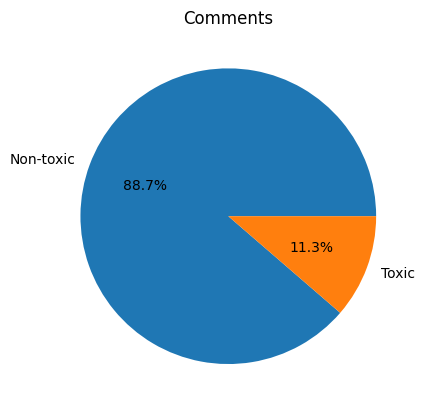

In [7]:
toxic_count = df['toxic'].value_counts()
toxic_count.plot.pie(labels=['Non-toxic', 'Toxic'], autopct='%.1f%%')
plt.title('Comments')
plt.ylabel(None);

### Histogram for toxicity column

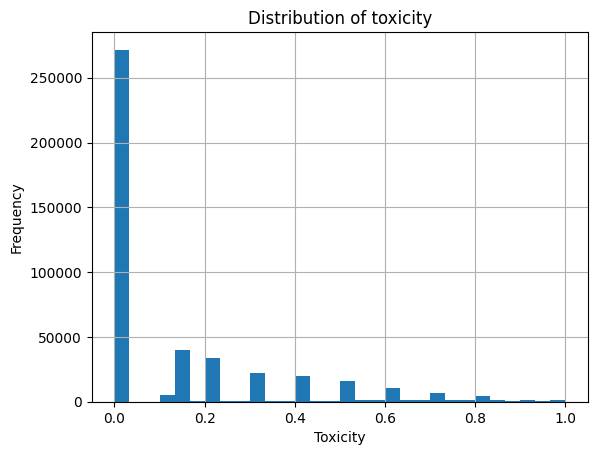

In [8]:
df.toxicity.hist(bins=30)
plt.title('Distribution of toxicity')
plt.xlabel('Toxicity')
plt.ylabel('Frequency');

### Histograms for all numeric columns

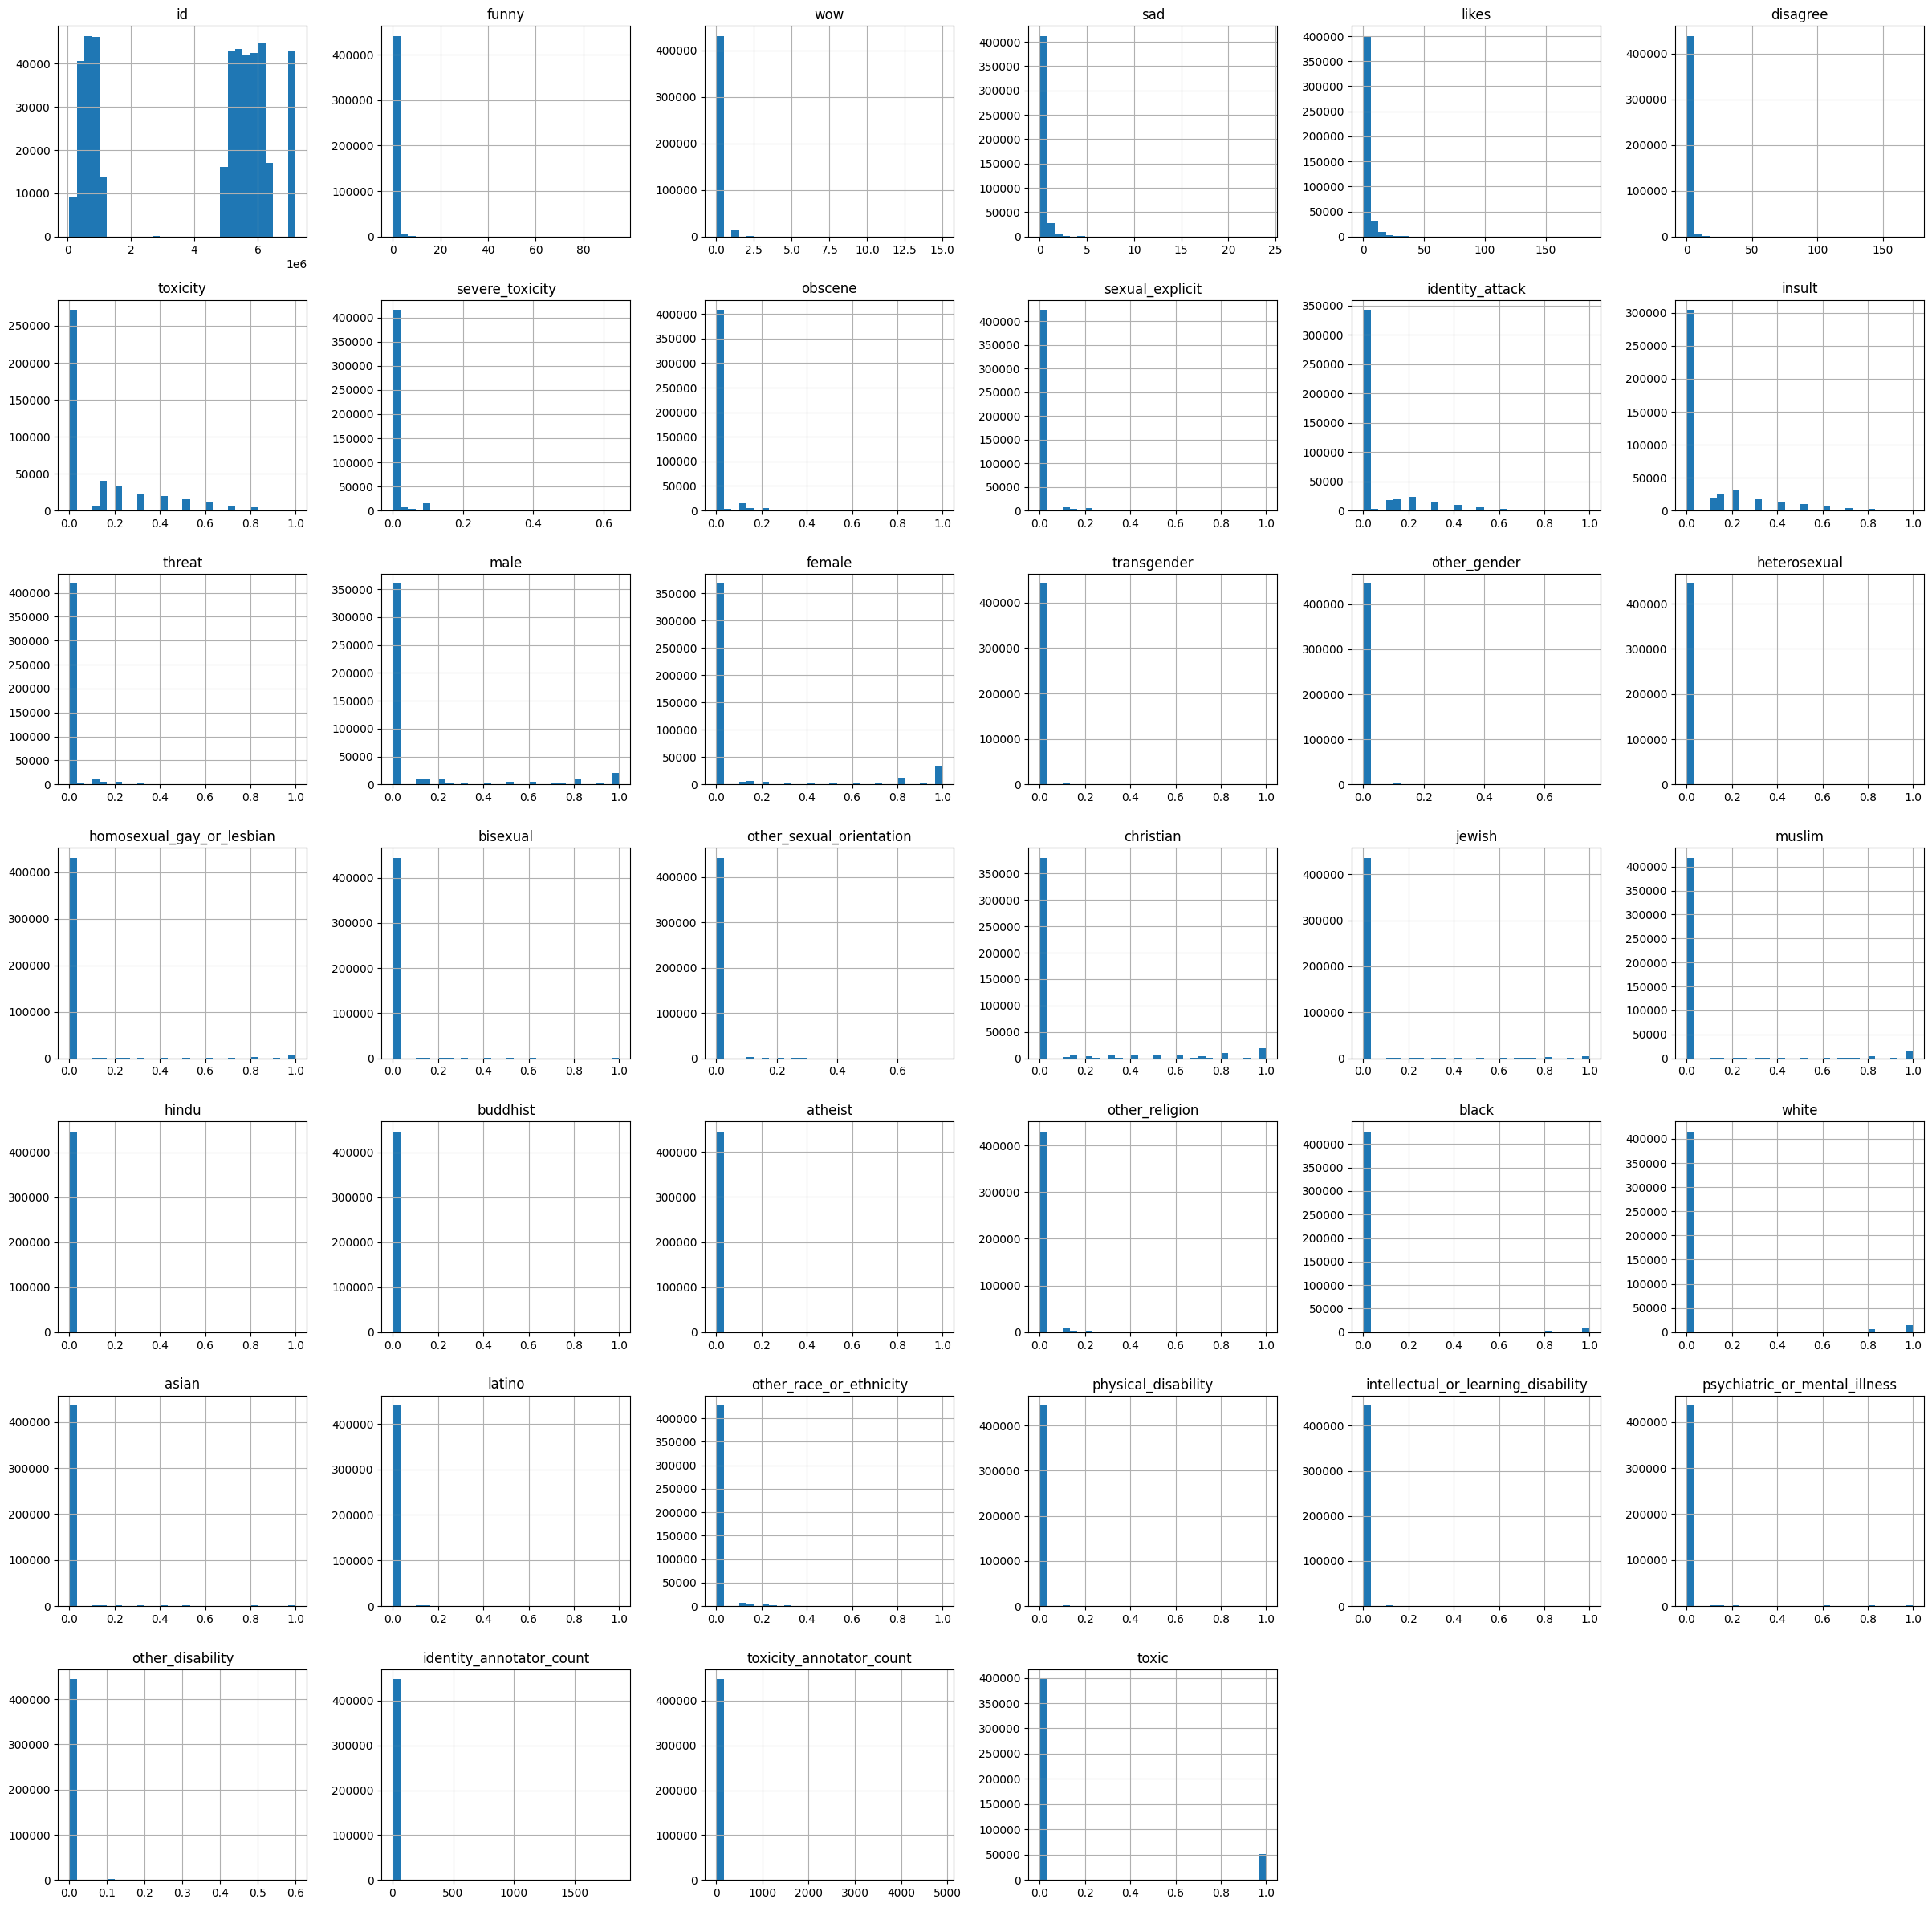

In [9]:
df.hist(bins=30, figsize=(30, 30));

### Boxplots for identity columns

Don't make much sense here because most observations have zero ...

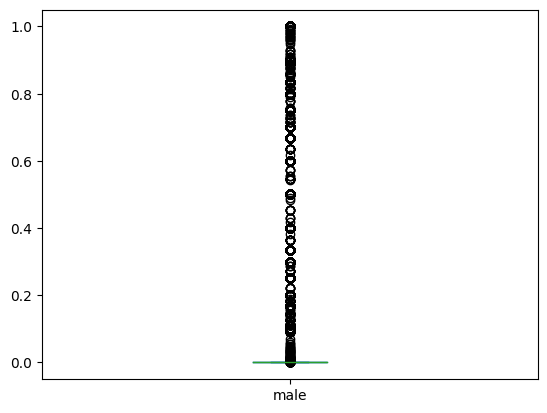

In [10]:
df['male'].plot.box();

### Calculate percentage for each identity

In [11]:
identity_cols = ['male', 'female', 'transgender', 'other_gender',
                 'heterosexual', 'homosexual_gay_or_lesbian', 'bisexual',
                 'other_sexual_orientation', 'christian', 'jewish', 'muslim',
                 'hindu', 'buddhist', 'atheist', 'other_religion', 'black',
                 'white', 'asian', 'latino', 'other_race_or_ethnicity',
                 'physical_disability', 'intellectual_or_learning_disability',
                 'psychiatric_or_mental_illness', 'other_disability']

# create new binary identity features/columns (1 if value >= 0.5)
bin_identity_cols = []
for identity in identity_cols:
    new_col = 'is_' + identity
    df[new_col] = (df[identity] >= 0.5).astype(int)
    bin_identity_cols.append(new_col)

print('# of identity columns:', len(identity_cols))
print('# of new binary identity columns:', len(bin_identity_cols))

# of identity columns: 24
# of new binary identity columns: 24


In [19]:
# calculate percentage for each identity
id_percentages = {}
for identity in bin_identity_cols:
    cnt = df[['id', identity]].groupby(identity).count()['id']
    perc = (cnt[1] / len(df) * 100).round(3)
    id_percentages[identity] = perc

print(id_percentages)

{'is_male': 10.909, 'is_female': 13.077, 'is_transgender': 0.616, 'is_other_gender': 0.002, 'is_heterosexual': 0.32, 'is_homosexual_gay_or_lesbian': 2.692, 'is_bisexual': 0.072, 'is_other_sexual_orientation': 0.002, 'is_christian': 9.966, 'is_jewish': 1.894, 'is_muslim': 5.144, 'is_hindu': 0.141, 'is_buddhist': 0.143, 'is_atheist': 0.378, 'is_other_religion': 0.079, 'is_black': 3.665, 'is_white': 6.146, 'is_asian': 1.123, 'is_latino': 0.498, 'is_other_race_or_ethnicity': 0.123, 'is_physical_disability': 0.02, 'is_intellectual_or_learning_disability': 0.026, 'is_psychiatric_or_mental_illness': 1.205, 'is_other_disability': 0.001}


female                                 13.077
male                                   10.909
christian                               9.966
white                                   6.146
muslim                                  5.144
black                                   3.665
homosexual_gay_or_lesbian               2.692
jewish                                  1.894
psychiatric_or_mental_illness           1.205
asian                                   1.123
transgender                             0.616
latino                                  0.498
atheist                                 0.378
heterosexual                            0.320
buddhist                                0.143
hindu                                   0.141
other_race_or_ethnicity                 0.123
other_religion                          0.079
bisexual                                0.072
intellectual_or_learning_disability     0.026
physical_disability                     0.020
other_gender                      

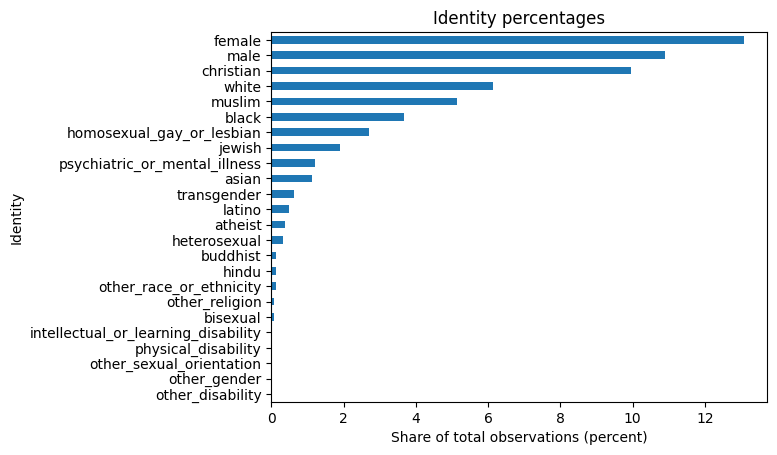

In [14]:
id_perc_ser = pd.Series(id_percentages).sort_values()
id_perc_ser.rename(lambda x: x.replace('is_', ''), inplace=True)
id_perc_ser.plot.barh()
plt.title('Identity percentages')
plt.xlabel('Share of total observations (percent)')
plt.ylabel('Identity');
display(id_perc_ser.sort_values(ascending=False))

### Average toxicity per identity (NOT SURE ABOUT THIS ...)

In [ ]:
# calculate average toxicity for each identity
id_avg_tox = {}
for identity in bin_identity_cols:
    avg_tox = df[['toxicity', identity]].groupby(identity).mean()['toxicity']
    id_avg_tox[identity] = avg_tox[1]

print(id_avg_tox)

{'is_male': 0.1815331711382364, 'is_female': 0.17210103628858642, 'is_transgender': 0.2509092158502635, 'is_other_gender': 0.25916666666666666, 'is_heterosexual': 0.26910483054255063, 'is_homosexual_gay_or_lesbian': 0.30425076193821987, 'is_bisexual': 0.24690460983085774, 'is_other_sexual_orientation': 0.3179427772874375, 'is_christian': 0.1359717633234815, 'is_jewish': 0.2119021573483268, 'is_muslim': 0.2621486810327176, 'is_hindu': 0.15519786431080518, 'is_buddhist': 0.1705236592674865, 'is_atheist': 0.17173746049227803, 'is_other_religion': 0.1818275460588971, 'is_black': 0.3212419405321476, 'is_white': 0.3031017349280547, 'is_asian': 0.15415656572756428, 'is_latino': 0.21860649513668723, 'is_other_race_or_ethnicity': 0.21598249962326505, 'is_physical_disability': 0.1461314679520976, 'is_intellectual_or_learning_disability': 0.08238202835903985, 'is_psychiatric_or_mental_illness': 0.22675020712510044, 'is_other_disability': 0.14857142857142855}


black                                  0.321242
other_sexual_orientation               0.317943
homosexual_gay_or_lesbian              0.304251
white                                  0.303102
heterosexual                           0.269105
muslim                                 0.262149
other_gender                           0.259167
transgender                            0.250909
bisexual                               0.246905
psychiatric_or_mental_illness          0.226750
latino                                 0.218606
other_race_or_ethnicity                0.215982
jewish                                 0.211902
other_religion                         0.181828
male                                   0.181533
female                                 0.172101
atheist                                0.171737
buddhist                               0.170524
hindu                                  0.155198
asian                                  0.154157
other_disability                       0

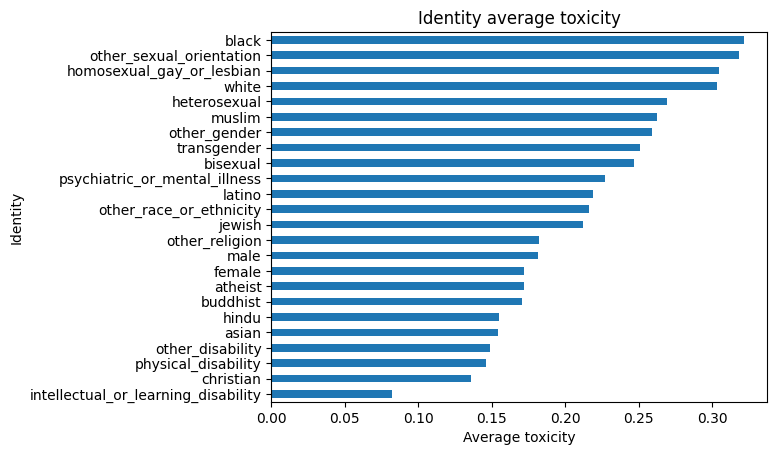

In [21]:
id_tox_ser = pd.Series(id_avg_tox).sort_values()
id_tox_ser.rename(lambda x: x.replace('is_', ''), inplace=True)
id_tox_ser.plot.barh()
plt.title('Identity average toxicity')
plt.xlabel('Average toxicity')
plt.ylabel('Identity');
display(id_tox_ser.sort_values(ascending=False))